Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Ahmed"
COLLABORATORS = ""

---

# CS110 Pre-class Work 11.1

The pre-class work for this session will focus on the rod cutting problem. Recall that the rod cutting problem takes as an input the length n of a rodand a table of prices $p_i$ for $i = 1,2,... n$, and one needs to determine the maximum revenue $r$ obtainable by cutting up the rod and selling the pieces. 

## Part A. 

You will implement in Python two solutions to the rod cutting problem, namely:

## Question 1. 
A recursive top-down solution to the rod cutting problem. Please complete the cut_rod function below:


In [9]:
def cut_rod(p,n):
    """
    A recursive top-down solution to the rod cutting problem as described in 
    Cormen et. al. (pp 363) This calculates the maximum revenue that could be 
    earned by cutting up a rod of length n.
    
    Inputs;:
    - p: list of floats, the prices of rods of different lengths. p[i] gives the dollars
    of revenue the company earns selling a rod of length i+1.
    - n: int, length of the rod
    
    Outputs:
    - q: float, the optimal revenue
    """
    # YOUR CODE HERE
    if n == 0:
        return 0
    q = - float("inf")
    for i in range(n):
        q = max(q,p[i]+cut_rod(p,n-i-1))
    return q 
    

In [10]:
# price list from textbook
p = [1,5,8,9,10,17,17,20,24,30] #p[i] gives the price of length i+1

#results from textbook
r = [0,1,5,8,10,13,17,18,22,25,30]
for i in range(len(r)):
    print(cut_rod(p,i)==r[i])

True
True
True
True
True
True
True
True
True
True
True


In [5]:
# price list from textbook
p = [1,5,8,9,10,17,17,20,24,30] #p[i] gives the price of length i+1

#results from textbook
r = [0,1,5,8,10,13,17,18,22,25,30]
for i in range(len(r)):
    assert(cut_rod(p,i)==r[i])

## Question 2.

An optimal rod cutting solution using dynamic programming (see figure [here](https://drive.google.com/open?id=1nu9gETKX4KJCHZDi17fZLQtkDVig81Zk) for inspiration). Please complete the following two functions: 


In [32]:
def extended_bottom_up_cut_rod(p,n):
    """
    Implements a bottom-up dynamic programming approach to the rod cutting problem.
    Here, "extended" means the function is geared in a way amenable to reconstructing
    an optimal solution, on top of the returned optimal value. See Cormen et al.,
    p. 269 for the implementation details.
    
    Inputs:
    - p: list of floats, the prices of rods of different lengths. p[i] gives the dollars
    of revenue the company earns selling a rod of length i+1.
    - n: int, length of the rod
    
    Outputs:
    - r: list of floats, the maximum revenues. r[i] gives the maximum revenue for a rod
    of length i. As such:
        * r[0] = 0
        * len(r) == n + 1
    - s: list of ints, the optimal sizes of the first piece to cut off. Also make sure 
    that:
        * s[0] = 0
        * len(s) == n + 1
    """
    # YOUR CODE HERE
    r=[0]* (n+1)
    s=[0]* (n+1)
    
    for j in range(1,n+1):
        q= - float("inf")
        for i in range(j):
            if q < (p[i]+r[j-i-1]):
                q = (p[i]+r[j-i-1])
                s[j]=i+1
        r[j]=q
    return r, s

In [28]:
def print_cut_rod_solution(p,n):
    """
    Gives a solution to the rod cutting problem of size n. 
    
    Inputs:
    - p: list of floats, the prices of rods of different lengths. p[i] gives the revenue (in USD, for example) the company earns selling a rod of length i+1.
    - n: int, length of the rod
    
    Outputs:
    - sol: a list of ints, indicating how to cut the rod. Cutting the rod with the lengths
    given in sol gives the optimal revenue.
        * print_cut_rod_solution(p,0) == []
    """
    # YOUR CODE HERE
    r=[0]* (n+1)
    s=[0]* (n+1)
    
    for j in range(1,n+1):
        q=- float("inf")
        for i in range(j):
            if q < (p[i]+r[j-i-1]):
                q = (p[i]+r[j-i-1])
                s[j]=i+1
        
    return s


In [33]:
# price list from textbook
p = [1,5,8,9,10,17,17,20,24,30] #p[i] gives the price of length i+1
# Result of R and S from textbook:
R = [0,1,5,8,10,13,17,18,22,25,30]
S = [0,1,2,3,2,2,6,1,2,3,10]
# Test:
r, s = extended_bottom_up_cut_rod(p,10)
print(r)
print(s)

[0, 1, 5, 8, 10, 13, 17, 18, 22, 25, 30]
[0, 1, 2, 3, 2, 2, 6, 1, 2, 3, 10]


In [34]:
# price list from textbook
p = [1,5,8,9,10,17,17,20,24,30] #p[i] gives the price of length i+1
# Result of R and S from textbook:
R = [0,1,5,8,10,13,17,18,22,25,30]
S = [0,1,2,3,2,2,6,1,2,3,10]
# Test:
r, s = extended_bottom_up_cut_rod(p,10)
assert(r==R)
assert(s==S)

## Part B - Experiments

## Question 1.

Use the function below to generate a list of prices of length n=20 and assign that list to a new variable, `P`. You MUST use this list for parts 2 and 3 below.


In [35]:
import numpy as np
def generate_price_list(n):
    """Generates a price list of length n
    
    Inputs:
    - n: integer, length of the list, must be positive
    
    Outputs:
    - p: list, the ordered price list for each rod cut
    """
    p = [1]
    for i in range(1,n):
        np.random.seed(0)
        p.append(np.random.randint(p[i-1]+1, i*3+1))
    return p


## Question 2.

Time (using the time library) the implementation of `cut_rod` for different rod lengths for values of up to $n=20.$ Present your results in a plot. 


In [37]:
import time 
runtime=[]
n=20
p=generate_price_list(n)
for i in range (n+1):
    a= time.time()
    cut_rod(p,i)
    b= time.time()
    runtime.append(round(b-a, 5))
print(f"This operation took {runtime} seconds.")

This operation took [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001, 0.00099, 0.00199, 0.00399, 0.00499, 0.00898, 0.01695, 0.0389, 0.06682, 0.11369, 0.23737, 0.4877, 0.95696, 2.04574] seconds.


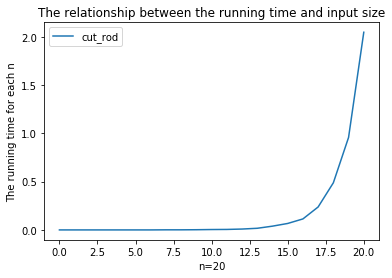

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
x = [i for i in range(0,21)]

fig, ax = plt.subplots()

ax.plot(x,runtime, label="cut_rod")

ax.set_xlabel('n=20')
ax.set_ylabel('The running time for each n')
ax.set_title('The relationship between the running time and input size')

leg = ax.legend();

## Question 3.

Time (using the time library) the implementation of `extended_bottom_up_cut_rod` for different rod lengths for values of up to $n=20$. Add the curve corresponding to this algorithm to the previous plot.

In [47]:
import time 
runtime2=[]
n=20
p=generate_price_list(n)
for i in range (n+1):
    a= time.time()
    extended_bottom_up_cut_rod(p,i)
    b= time.time()
    runtime2.append(round(b-a, 5))
print(f"This operation took {runtime2} seconds.")

This operation took [0.0, 0.001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001, 0.0] seconds.


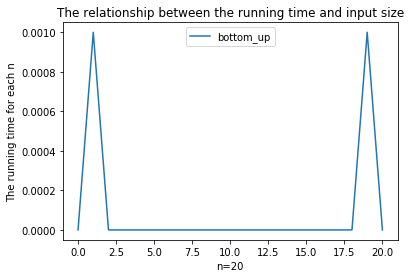

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
x = [i for i in range(0,21)]

fig, ax = plt.subplots()

ax.plot(x,runtime2, label="bottom_up")

ax.set_xlabel('n=20')
ax.set_ylabel('The running time for each n')
ax.set_title('The relationship between the running time and input size')

leg = ax.legend();

## Question 4.

Contrast both curves. What can you conclude?

The extended_bottom_up_cut_rod takes a lot less time than the direct cut_rod. The multiple peaks in the graph are due to some normal running differences between the iterations (0,0.001)

## Part C - After completing your experiments above, answer the following questions:

## Question 1.
Estimate how big $n$ has to be before the non-dynamic-programming version will take a million years to finish. Call this value N.

2^n=1000000
log2(1000000)=20

## Question 2.
Estimate (or time) how long it takes to evaluate `extended_bottom_up_cut_rod(p,N)`, where `N` is the value you got from the previous question. 

20^2=400

## [Optional]  Question 3. 
Do you notice anything peculiar about the solution for large n?

YOUR ANSWER HERE